In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 0. VARIABLES CREADAS

In [3]:
# df = data frame original
# df2 = copia de df con las columnas seleccionadas

# 1. DATAFRAME ORIGINAL (DF)

In [5]:
df = pd.read_csv("listings.csv")

In [6]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,269467,https://www.airbnb.com/rooms/269467,20240615011618,2024-06-15,city scrape,Sunny and quiet Loft next to Sagrada Familia,The apartment is a cosy open space with 65 m2....,NaN,https://a0.muscache.com/pictures/a6445a90-94eb...,1411775,...,4.79,4.81,4.67,HUTB-001129,t,3,3,0,0,1.15
1,270197,https://www.airbnb.com/rooms/270197,20240615011618,2024-06-15,city scrape,*monthly stays* 4 Bedroom Apartment near Rambla,Rented only for monthly periods. 4 bedroom apa...,NaN,https://a0.muscache.com/pictures/69907440-d8df...,1414702,...,5.00,5.00,4.50,N/A SOLO ESTANCIAS MENSUALES,f,27,27,0,0,0.02
2,18674,https://www.airbnb.com/rooms/18674,20240615011618,2024-06-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.68,4.78,4.30,HUTB-002062,t,27,27,0,0,0.30
3,272282,https://www.airbnb.com/rooms/272282,20240615011618,2024-06-15,previous scrape,"CHARMING, VERY SPACIOUS & BEST LOCATED",Very spacious apartment located in a modernist...,Eixample is famous for being home to the major...,https://a0.muscache.com/pictures/monet/Select-...,1425070,...,4.96,4.84,4.80,HUTB003208,f,1,1,0,0,2.84
4,23197,https://www.airbnb.com/rooms/23197,20240615011618,2024-06-15,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax","Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.62,4.64,HUTB005057,f,1,1,0,0,0.48


### 1.1 Shape

In [8]:
df.shape

(18925, 75)

### 1.2 Columnas

In [10]:
list(enumerate(df.columns))

[(0, 'id'),
 (1, 'listing_url'),
 (2, 'scrape_id'),
 (3, 'last_scraped'),
 (4, 'source'),
 (5, 'name'),
 (6, 'description'),
 (7, 'neighborhood_overview'),
 (8, 'picture_url'),
 (9, 'host_id'),
 (10, 'host_url'),
 (11, 'host_name'),
 (12, 'host_since'),
 (13, 'host_location'),
 (14, 'host_about'),
 (15, 'host_response_time'),
 (16, 'host_response_rate'),
 (17, 'host_acceptance_rate'),
 (18, 'host_is_superhost'),
 (19, 'host_thumbnail_url'),
 (20, 'host_picture_url'),
 (21, 'host_neighbourhood'),
 (22, 'host_listings_count'),
 (23, 'host_total_listings_count'),
 (24, 'host_verifications'),
 (25, 'host_has_profile_pic'),
 (26, 'host_identity_verified'),
 (27, 'neighbourhood'),
 (28, 'neighbourhood_cleansed'),
 (29, 'neighbourhood_group_cleansed'),
 (30, 'latitude'),
 (31, 'longitude'),
 (32, 'property_type'),
 (33, 'room_type'),
 (34, 'accommodates'),
 (35, 'bathrooms'),
 (36, 'bathrooms_text'),
 (37, 'bedrooms'),
 (38, 'beds'),
 (39, 'amenities'),
 (40, 'price'),
 (41, 'minimum_nights')

# 2. SELECCIÓN DE COLUMNAS & COPIA DE DF (DF2)

### 2.1 Columnas seleccionadas


In [13]:
columnas_seleccionadas = [
    "description",
    "name",
    "host_since",
    "host_location",
    "host_is_superhost",
    "host_identity_verified",
    "host_has_profile_pic",
    "neighbourhood_group_cleansed",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "has_availability",
    "availability_30",
    "availability_60",
    "number_of_reviews",
    "last_review",
    "review_scores_rating",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "reviews_per_month",
    "license",
    "instant_bookable",
    "listing_url",
    "bathrooms_text"
]

### 2.2 Creación nuevo dataframe (df2)

In [15]:
df2 = df[columnas_seleccionadas].copy()

In [16]:
df2.head()

,description,name,host_since,host_location,host_is_superhost,host_identity_verified,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,license,instant_bookable,listing_url,bathrooms_text
0,The apartment is a cosy open space with 65 m2....,Sunny and quiet Loft next to Sagrada Familia,2011-11-16,"Barcelona, Spain",f,t,t,Eixample,41.401810,2.17610,...,4.59,4.83,4.79,4.81,4.67,1.15,HUTB-001129,t,https://www.airbnb.com/rooms/269467,1 bath
1,Rented only for monthly periods. 4 bedroom apa...,*monthly stays* 4 Bedroom Apartment near Rambla,2011-11-16,"Barcelona, Spain",f,t,t,Ciutat Vella,41.379360,2.17376,...,4.50,5.00,5.00,5.00,4.50,0.02,N/A SOLO ESTANCIAS MENSUALES,f,https://www.airbnb.com/rooms/270197,1.5 baths
2,110m2 apartment to rent in Barcelona. Located ...,Huge flat for 8 people close to Sagrada Familia,2010-01-19,"Barcelona, Spain",f,t,t,Eixample,41.405560,2.17262,...,4.63,4.75,4.68,4.78,4.30,0.30,HUTB-002062,t,https://www.airbnb.com/rooms/18674,2 baths
3,Very spacious apartment located in a modernist...,"CHARMING, VERY SPACIOUS & BEST LOCATED",2011-11-20,"Barcelona, Spain",t,t,t,Eixample,41.383470,2.15802,...,4.97,4.94,4.96,4.84,4.80,2.84,HUTB003208,f,https://www.airbnb.com/rooms/272282,2 baths
4,"Beautiful spacious apartment, large terrace, 5...","Forum CCIB DeLuxe, Spacious, Large Balcony, relax",2010-03-09,"Catalonia, Spain",f,t,t,Sant Martí,41.412432,2.21975,...,4.89,4.95,4.99,4.62,4.64,0.48,HUTB005057,f,https://www.airbnb.com/rooms/23197,2 baths


### 2.3 Shape

In [18]:
df2.shape

(18925, 36)

### 2.4 Información 

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   description                   18242 non-null  object 
 1   name                          18925 non-null  object 
 2   host_since                    18923 non-null  object 
 3   host_location                 14497 non-null  object 
 4   host_is_superhost             18801 non-null  object 
 5   host_identity_verified        18923 non-null  object 
 6   host_has_profile_pic          18923 non-null  object 
 7   neighbourhood_group_cleansed  18925 non-null  object 
 8   latitude                      18925 non-null  float64
 9   longitude                     18925 non-null  float64
 10  property_type                 18925 non-null  object 
 11  room_type                     18925 non-null  object 
 12  accommodates                  18925 non-null  int64  
 13  b

### 2.5 Valores nulos

In [22]:
df2.isnull().sum()

description                      683
name                               0
host_since                         2
host_location                   4428
host_is_superhost                124
host_identity_verified             2
host_has_profile_pic               2
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                       3743
bedrooms                        1882
beds                            3838
amenities                          0
price                           3736
minimum_nights                     0
maximum_nights                     0
has_availability                1050
availability_30                    0
availability_60                    0
number_of_reviews                  0
last_review                     4787
review_scores_rating            4787
review_scores_cleanliness       4808
r

### 2.6 Valores estadísticos

In [24]:
df2.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,18925.000000,18925.000000,18925.000000,15182.000000,17043.000000,15087.000000,18925.000000,18925.000000,18925.000000,18925.000000,18925.000000,14138.000000,14117.000000,14115.000000,14118.000000,14115.000000,14116.000000,14138.000000
mean,41.392151,2.167022,3.335324,1.402681,1.797160,2.299596,15.582985,542.361744,7.737173,20.228269,46.618917,4.594931,4.614694,4.725212,4.726785,4.751971,4.467296,1.523345
std,0.014240,0.017629,2.161128,0.830705,1.225817,2.234019,32.654123,424.071843,9.230064,19.771069,96.716517,0.489164,0.482940,0.447504,0.451375,0.362439,0.536958,2.026505
min,41.350673,2.085593,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,41.380968,2.156540,2.000000,1.000000,1.000000,1.000000,1.000000,315.000000,0.000000,1.000000,0.000000,4.460000,4.500000,4.670000,4.670000,4.670000,4.320000,0.230000
50%,41.389758,2.167993,3.000000,1.000000,1.000000,2.000000,3.000000,365.000000,4.000000,14.000000,7.000000,4.710000,4.750000,4.860000,4.860000,4.850000,4.580000,0.880000
75%,41.401690,2.177690,4.000000,2.000000,2.000000,3.000000,31.000000,1125.000000,13.000000,37.000000,48.000000,4.910000,4.930000,5.000000,5.000000,5.000000,4.780000,2.270000
max,41.458092,2.227710,16.000000,50.000000,50.000000,127.000000,1124.000000,3000.000000,30.000000,60.000000,2121.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,70.470000


### 2.7 Valores únicos de todas las columnas de df2

In [26]:
for column in df2.columns:
    unique_values = df2[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("-" * 50)

Valores únicos en la columna 'description':
['The apartment is a cosy open space with 65 m2. The living room and a bedroom areas look onto the quite balcony facing to south (a lot of sun). The loft has also a dinning area with a big table and a good desk area with books about Barcelona. There is a high quality internet service and a single folding bed. The bedroom area has a double bed and wardrobe, the living area has a sofa, TV and Hi-Fi. There is a separate kitchen-'
 'Rented only for monthly periods. 4 bedroom apartment located in the heart of Barcelona next to la Rambla and Liceu thater one of the most active areas in Barcelona a great place to live and enjoy the city. Please consider it is a second floor and there is no elevator. There are 4 rooms and one bed in each room so it would be ideal for 4 people'
 '110m2 apartment to rent in Barcelona. Located in the Eixample district, near the Sagrada Familia. It has a small balcony where you can see the temple of Gaudi. Capacity for 8

# 3. TRATAMIENTO & MODIFICACIÓN DE COLUMNAS

In [28]:
df2.head(3)

,description,name,host_since,host_location,host_is_superhost,host_identity_verified,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,license,instant_bookable,listing_url,bathrooms_text
0,The apartment is a cosy open space with 65 m2....,Sunny and quiet Loft next to Sagrada Familia,2011-11-16,"Barcelona, Spain",f,t,t,Eixample,41.40181,2.17610,...,4.59,4.83,4.79,4.81,4.67,1.15,HUTB-001129,t,https://www.airbnb.com/rooms/269467,1 bath
1,Rented only for monthly periods. 4 bedroom apa...,*monthly stays* 4 Bedroom Apartment near Rambla,2011-11-16,"Barcelona, Spain",f,t,t,Ciutat Vella,41.37936,2.17376,...,4.50,5.00,5.00,5.00,4.50,0.02,N/A SOLO ESTANCIAS MENSUALES,f,https://www.airbnb.com/rooms/270197,1.5 baths
2,110m2 apartment to rent in Barcelona. Located ...,Huge flat for 8 people close to Sagrada Familia,2010-01-19,"Barcelona, Spain",f,t,t,Eixample,41.40556,2.17262,...,4.63,4.75,4.68,4.78,4.30,0.30,HUTB-002062,t,https://www.airbnb.com/rooms/18674,2 baths


### 3.1 price

In [30]:
# Eliminación filas df2 donde "price"= nulos

In [31]:
df2 = df2.dropna(subset=['price'])

In [32]:
# Comprobación nulos "price"
df2['price'].isnull().sum()

0

In [33]:
# Comprobación reducción filas df2
df2.shape

(15189, 36)

In [34]:
# Eliminar símbolos como el dólar de la columna 'price'
df2.loc[:, 'price'] = df2['price'].replace(r'[\$,]', '', regex=True)

In [35]:
# Convertir la columna 'price' a tipo numérico
df2.loc[:, 'price'] = pd.to_numeric(df2['price'], errors='coerce')

In [36]:
df2['price'] = df2['price'].astype('float64')

In [37]:
df2['price'].head()

0    176.0
1     74.0
2    257.0
4    249.0
5    240.0
Name: price, dtype: float64

### 3.2 host_since

In [39]:
# Comprobación valores únicos
df2["host_since"].unique()

array(['2011-11-16', '2010-01-19', '2010-03-09', ..., '2017-01-14',
       '2021-04-20', '2024-06-07'], dtype=object)

In [40]:
# Comprobación valores nulos
df2["host_since"].isnull().sum()

0

In [41]:
# Cambiar tipo de dato a fecha 
df2['host_since'] = pd.to_datetime(df2['host_since'])

In [42]:
# Crear un objeto Timestamp específico
fecha_especifica = pd.Timestamp('2024-08-05')

In [43]:
# Calcular la diferencia en días entre fecha_especifica y host_since
df2['host_since'] = (fecha_especifica - df2['host_since']).dt.days

In [44]:
# Comprobación valores únicos
df2["host_since"].unique()

array([4646, 5312, 5263, ..., 2760, 1203,   59])

### 3.3 host_location

In [46]:
# Comrpobación valores únicos
df2["host_location"].unique()

array(['Barcelona, Spain', 'Catalonia, Spain', nan, 'Colon, Panama',
       'Callao Salvaje, Spain', "L'Hospitalet de l'Infant, Spain",
       'Spain', 'Tossa de Mar, Spain', 'Amsterdam, Netherlands',
       'Madrid, Spain', 'Sabadell, Spain', 'Paiporta, Spain', 'France',
       'Linyola, Spain', 'Hamburg, Germany', 'Teià, Spain',
       'Vilanova i la Geltrú, Spain', 'La Garriga, Spain',
       'Premià de Dalt, Spain', 'Cabrils, Spain', 'Castelldefels, Spain',
       'Viladecans, Spain', 'Tarragona, Spain', 'Sitges, Spain',
       'London, United Kingdom', 'Badalona, Spain',
       'Hospitalet de Llobregat, Spain', 'Rome, Italy',
       'Montesson, France', 'Sant Celoni, Spain', 'Stockholm, Sweden',
       'Caldes de Montbui, Spain', 'San Francisco, CA',
       'Arenys de Mar, Spain', 'Altafulla, Spain', 'Terrassa, Spain',
       'Sant Andreu de Llavaneres, Spain',
       'Sant Vicenç de Montalt, Spain', 'Stuttgart, Germany',
       'Santiago, Chile', 'Sant Boi de Llobregat, Spain', '

In [47]:
# Comprobación valores nulos
df2["host_location"].isnull().sum()

3232

In [48]:
# Transformar el formato a tipo string
df2['host_location'] = df2['host_location'].astype('string')

In [49]:
# Crear lista con los valores de 'spain'
def contains_spain(x):
    if pd.isna(x):
        return False
    return 'spain' in x.lower()

In [50]:
# Filtrar el DataFrame y obtener los valores únicos de 'host_location' que contienen 'spain'
list_spain = df2[df2['host_location'].apply(contains_spain)]['host_location'].unique()

In [51]:
# Reemplazar todos los valores en list_spain por 'spain'
df2['host_location'] = df2['host_location'].apply(lambda x: 'spain' if x in list_spain else x)

In [52]:
# Reemplazar todo lo que no sea 'Spain' por 'no_spain'
df2['host_location'] = df2['host_location'].apply(lambda x: 'no_spain' if pd.notna(x) and x != 'spain' else x)

In [53]:
# Completar todos los valores nulos con 'no_info'
df2['host_location'] = df2['host_location'].fillna('no_info')

In [54]:
# Comprobación valores únicos 
df2["host_location"].unique()

array(['spain', 'no_info', 'no_spain'], dtype=object)

In [55]:
# Comprobación valores nulos
df2["host_location"].isnull().sum()

0

### 3.4 host_is_superhost

In [57]:
# Comrpobación valores únicos
df2["host_is_superhost"].unique()

array(['f', 't', nan], dtype=object)

In [58]:
# Comprobación valores nulos
df2["host_is_superhost"].isnull().sum()

119

In [59]:
df2['host_is_superhost']

0        f
1        f
2        f
4        f
5        f
        ..
18920    f
18921    f
18922    f
18923    f
18924    f
Name: host_is_superhost, Length: 15189, dtype: object

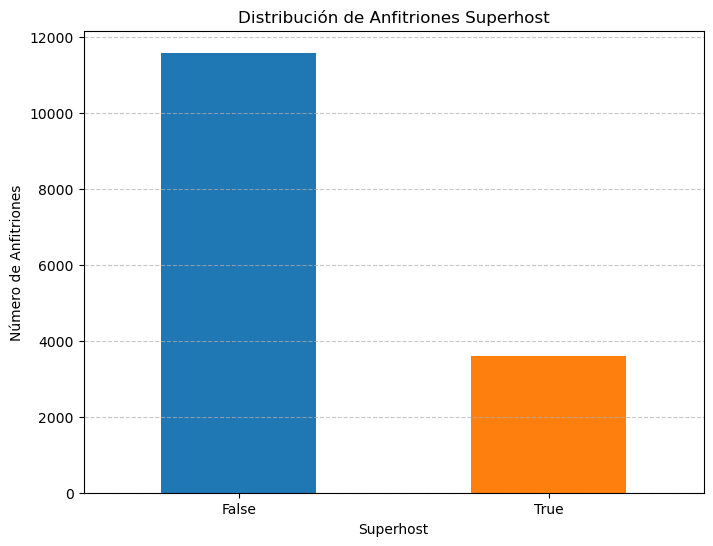

In [489]:
# Contar los valores de cada categoría en 'host_is_superhost'
value_counts = df2['host_is_superhost'].value_counts()

# Crear el histograma
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribución de Anfitriones Superhost')
plt.xlabel('Superhost')
plt.ylabel('Número de Anfitriones')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df2['host_is_superhost']

In [60]:
# Completar todos los valores nulos con 'false'
df2['host_is_superhost'] = df2['host_is_superhost'].map({'t': True, 'f': False})
df2['host_is_superhost'] = df2['host_is_superhost'].fillna(False)

In [61]:
# Comprobación valores únicos
df2['host_is_superhost'].unique()

array([False, True, nan], dtype=object)

In [62]:
# Comprobación valores nulos
df2['host_is_superhost'].isnull().sum()

119

In [63]:
# Cambiar a tipo booleano
df2['host_is_superhost'] = df2['host_is_superhost'].astype(bool)
print(df2['host_is_superhost'].dtype)

bool


### 3.5 host_identity_verified

In [65]:
# Comrpobación valores únicos
df2["host_identity_verified"].unique()

array(['t', 'f'], dtype=object)

In [66]:
# Comrpobación valores nulos
df2["host_identity_verified"].isnull().sum()

0

In [67]:
# Cambiar tipo de dato a booleano
df2['host_identity_verified'] = df2['host_identity_verified'].map({'t': True, 'f': False})
df2['host_identity_verified'] = df2['host_identity_verified'].astype(bool)

In [68]:
# Comprobación del cambio 
print(df2['host_identity_verified'].dtype)
print(df2['host_identity_verified'].unique())

bool
[ True False]


### 3.6 host_has_profile pic

In [70]:
# Comrpobación valores únicos
df2["host_has_profile_pic"].unique()

array(['t', 'f'], dtype=object)

In [71]:
# Comprobación valores nulos
df2['host_has_profile_pic'].isnull().sum()

0

In [72]:
# Cambiar tipo de dato a booleano
df2['host_has_profile_pic'] = df2['host_has_profile_pic'].map({'t': True, 'f': False})
df2['host_has_profile_pic'] = df2['host_has_profile_pic'].astype(bool)

In [73]:
# Comprobación del cambio 
print(df2['host_identity_verified'].dtype)
print(df2['host_identity_verified'].unique())

bool
[ True False]


### 3.7 bathrooms

In [75]:
# Comprobación valores nulos 
df2['bathrooms'].isnull().sum()

7

In [76]:
# Localización valores nulos de'bathroom' U 'listing_url' en la df original
url_bathrooms = df2.loc[df2['bathrooms'].isna(), ['bathrooms', 'listing_url']]

print(url_bathrooms)

       bathrooms                                       listing_url
14617        NaN   https://www.airbnb.com/rooms/939973318879363498
14949        NaN   https://www.airbnb.com/rooms/964339945010102928
15580        NaN  https://www.airbnb.com/rooms/1013268024586260166
15904        NaN  https://www.airbnb.com/rooms/1031002061578844729
17106        NaN  https://www.airbnb.com/rooms/1101999350577324560
18388        NaN  https://www.airbnb.com/rooms/1151404135945744837
18601        NaN  https://www.airbnb.com/rooms/1160842594736431325


In [77]:
# Completar con 1 toda la columna de nulos en bathrooms
df2['bathrooms'] = df2['bathrooms'].fillna(1)

In [78]:
# Comprobación valores nulos 'bathrooms'
df2['bathrooms'].isna().sum()

0

### 3.8 bathrooms_text

In [80]:
df2['bathrooms_text']

0           1 bath
1        1.5 baths
2          2 baths
4          2 baths
5        1.5 baths
           ...    
18920       1 bath
18921      2 baths
18922      2 baths
18923       1 bath
18924       1 bath
Name: bathrooms_text, Length: 15189, dtype: object

In [81]:
# Comprobación valores únicos
df2["bathrooms_text"].unique()

array(['1 bath', '1.5 baths', '2 baths', '3 baths', '3.5 baths',
       '1 shared bath', '1.5 shared baths', '2.5 baths', '1 private bath',
       '4 baths', 'Shared half-bath', '2 shared baths', '0 baths',
       '5.5 baths', '7.5 baths', nan, '6 baths', '4.5 baths',
       '0 shared baths', '2.5 shared baths', 'Half-bath', '5 baths',
       '8 baths', '3 shared baths', '8 shared baths', 'Private half-bath',
       '4 shared baths', '50 baths', '3.5 shared baths', '6 shared baths',
       '5 shared baths', '10 baths', '4.5 shared baths', '13 baths',
       '15 baths'], dtype=object)

In [82]:
# Creación de nueva columna llamada 'type_bathroom' que refleje en función de la columna 'bathrooms_texted' si es shared o private
df2['type_bathroom'] = df2['bathrooms_text'].apply(lambda x: 'shared' if 'shared' in str(x).lower() else 'private')

In [83]:
# Comrpobación de la nueva columna type_bathroom
df2["type_bathroom"].unique()

array(['private', 'shared'], dtype=object)

In [84]:
#Eliminación de la columna bathroom_text
df2.drop('bathrooms_text', axis=1, inplace=True)

### 3.9 neighbourhood_group_cleansed	

In [86]:
# Cambio nombre columna por neighbourhood
df2.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'}, inplace=True)

In [87]:
# Transformación de los datos (minúsculas, sin acentos, _....etc)
df2['neighbourhood'] = df2['neighbourhood'] \
    .str.lower() \
    .str.replace(' ', '_', regex=False) \
    .str.replace('-', '_', regex=False) \
    .str.normalize('NFKD') \
    .str.encode('ascii', errors='ignore') \
    .str.decode('ascii')

In [88]:
# Comprobación valores únicos
df2['neighbourhood'].unique()

array(['eixample', 'ciutat_vella', 'sant_marti', 'gracia',
       'sarria_sant_gervasi', 'sants_montjuic', 'les_corts',
       'horta_guinardo', 'sant_andreu', 'nou_barris'], dtype=object)

### 3.10 property_type

In [90]:
# Transformación de los datos (minúsculas, sin acentos, _....etc)
df2['property_type'] = df2['property_type'] \
    .str.lower() \
    .str.replace(' ', '_', regex=False) \
    .str.replace('-', '_', regex=False) \
    .str.normalize('NFKD') \
    .str.encode('ascii', errors='ignore') \
    .str.decode('ascii')

In [91]:
# Comprobación valores únicos
df2['property_type'].unique()

array(['entire_loft', 'entire_rental_unit', 'entire_condo',
       'entire_vacation_home', 'entire_home', 'entire_serviced_apartment',
       'private_room_in_rental_unit', 'entire_townhouse',
       'private_room_in_condo', 'private_room_in_home',
       'entire_guest_suite', 'private_room_in_casa_particular',
       'private_room_in_serviced_apartment', 'room_in_serviced_apartment',
       'private_room_in_bed_and_breakfast', 'entire_villa',
       'private_room_in_guesthouse', 'tiny_home',
       'shared_room_in_rental_unit', 'shared_room_in_bed_and_breakfast',
       'room_in_aparthotel', 'private_room_in_loft',
       'shared_room_in_hostel', 'private_room', 'room_in_boutique_hotel',
       'entire_guesthouse', 'private_room_in_guest_suite', 'barn',
       'shared_room_in_floor', 'private_room_in_villa',
       'private_room_in_townhouse', 'entire_place', 'boat',
       'shared_room_in_home', 'private_room_in_hostel', 'room_in_hostel',
       'room_in_hotel', 'entire_chalet', 'cas

### 3.11 room_type

In [93]:
# Transformación de los datos (minúsculas, sin acentos, _....etc)
df2['room_type'] = df2['room_type'] \
    .str.lower() \
    .str.replace(' ', '_', regex=False) \
    .str.replace('-', '_', regex=False) \
    .str.replace('/', '_', regex=False) \
    .str.normalize('NFKD') \
    .str.encode('ascii', errors='ignore') \
    .str.decode('ascii')

In [94]:
# Comprobación valores únicos
df2['room_type'].unique()

array(['entire_home_apt', 'private_room', 'hotel_room', 'shared_room'],
      dtype=object)

### 3.12 has_availability

In [592]:
df2['has_availability'].describe()

count     15189
unique        2
top        True
freq      15079
Name: has_availability, dtype: object

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


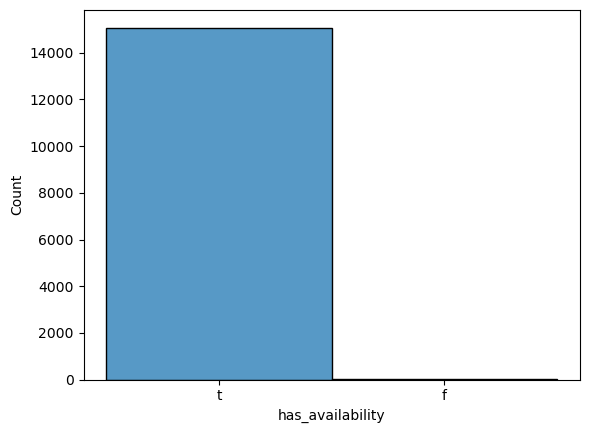

In [97]:
sns.histplot(data = df2, x='has_availability')
plt.show()

In [98]:
# Comprobación valores nulos 
df2["has_availability"].isnull().sum()

89

In [595]:
# Completar celdas vacias con True (Moda)
df2['has_availability'] = df2['has_availability'].map({'t': True, 'no': False}).fillna(True)

In [100]:
# Convertir columna a tipo booleano
df2['has_availability'] = df2['has_availability'].astype(bool)

In [101]:
# Comprobación valores nulos
df2["has_availability"].isnull().sum()

0

In [102]:
# Comprobación valores únicos
df2['has_availability'].unique()

array([ True, False])

### 3.13 review_scores_rating

In [104]:
df2['review_scores_rating'].describe()

count    11872.000000
mean         4.591732
std          0.480347
min          1.000000
25%          4.460000
50%          4.700000
75%          4.890000
max          5.000000
Name: review_scores_rating, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


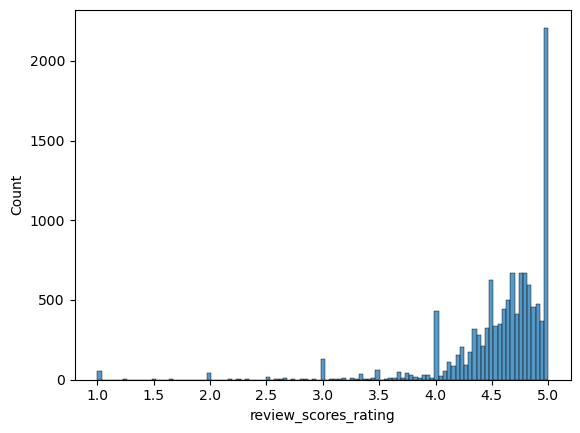

In [105]:
sns.histplot(data = df2, x='review_scores_rating')
plt.show()

In [106]:
# Reemplazar valores faltantes por media
df2['review_scores_rating'] = df2['review_scores_rating'].fillna(df2['review_scores_rating'].mean())

In [107]:
# Comprobación valores nulos 
df2["review_scores_rating"].isnull().sum()

0

### 3.14 review_scores_cleanliness

In [109]:
df2["review_scores_cleanliness"].describe()

count    11854.000000
mean         4.618333
std          0.461061
min          1.000000
25%          4.500000
50%          4.740000
75%          4.910000
max          5.000000
Name: review_scores_cleanliness, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


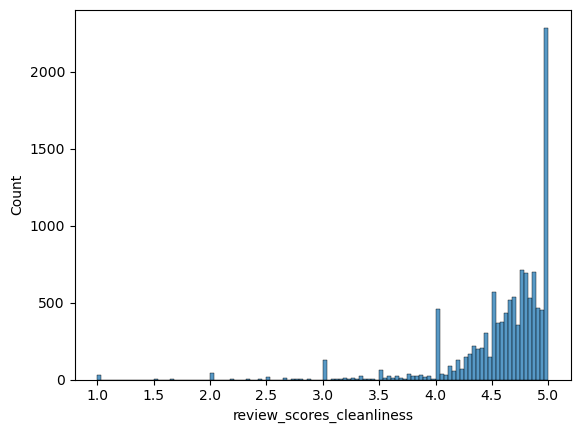

In [110]:
sns.histplot(data = df2, x='review_scores_cleanliness')
plt.show()

In [111]:
# Reemplazar valores faltantes por media
df2['review_scores_cleanliness'] = df2['review_scores_cleanliness'].fillna(df2['review_scores_cleanliness'].mean())

In [112]:
# Comprobación valores nulos 
df2["review_scores_cleanliness"].isnull().sum()

0

### 3.15 last_review

In [114]:
df2["last_review"].describe()

count          11872
unique          1023
top       2024-06-09
freq             393
Name: last_review, dtype: object

In [115]:
# Comprobación nulos 
df2["last_review"].isnull().sum()

3317

In [116]:
# Convertir la columna last_review a formato datetime
df2['last_review'] = pd.to_datetime(df2['last_review'])

In [117]:
# Crear un objeto Timestamp específico
fecha_especifica = pd.Timestamp('2024-08-05')

In [118]:
# Calcular la diferencia en días entre fecha_especifica y last_review
df2['last_review'] = (fecha_especifica - df2['last_review']).dt.days

In [119]:
df2['last_review'].describe()

count    11872.000000
mean       193.116240
std        344.626397
min         52.000000
25%         63.000000
50%         75.000000
75%        156.000000
max       4792.000000
Name: last_review, dtype: float64

In [120]:
# Calcular el promedio de los días en la columna 'last_review' del DataFrame df2
promedio_dias = df2['last_review'].mean()

In [121]:
# Reemplazar valores NaN en 'last_review' con el promedio calculado
df2['last_review'] = df2['last_review'].fillna(promedio_dias)

In [122]:
# Comprobación valores nulos 
df2["last_review"].isnull().sum()

0

### 3.16 bedrooms

In [124]:
# Comprobación valores nulos
df2['bedrooms'].isnull().sum()

10

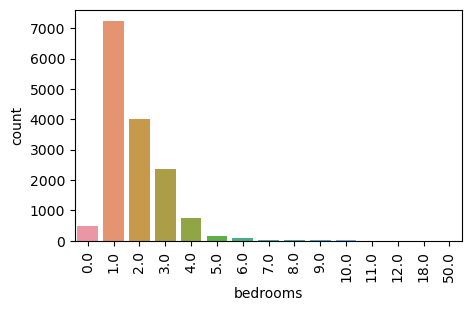

In [125]:
plt.figure(figsize = (5,3))
sns.countplot(data = df2, x = "bedrooms")
plt.xticks(rotation = 90)
plt.show()

In [126]:
# Convertir los valores mayores a 12 en NaN
df2.loc[df2['bedrooms'] > 12, 'bedrooms'] = np.nan

In [127]:
#Crear matriz de correlacion entre bedrooms i price 
df_subset = df2[['price', 'bedrooms']]

<Axes: >

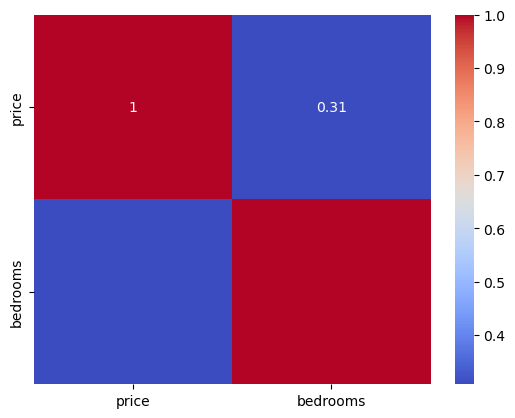

In [128]:
sns.heatmap(
    df_subset.corr(),
    annot = True,
    cmap = "coolwarm"
)

In [129]:
# La relación entre 'bedrooms' y 'price' es demasiado baja para justificar el uso de una regresión lineal. 
# Se usará el promedio para reemplazar los valores faltantes.

In [553]:
# Calcular la media de la columna 'bedrooms'
mean_value = df2['bedrooms'].mean()
mean_value

1.8043621507643648

In [131]:
# Sustituir los valores nulos por la media
df2['bedrooms'] = df2['bedrooms'].fillna(mean_value)

In [132]:
# Comprobación valores nulos 
df2['bedrooms'].isnull().sum()

0

### 3.17 beds

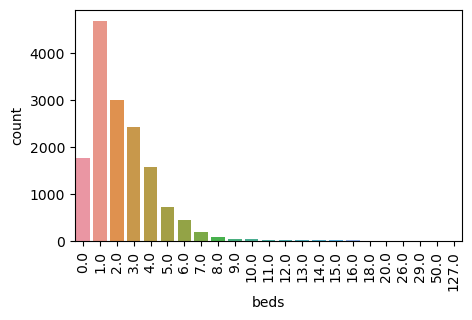

In [134]:
plt.figure(figsize = (5,3))
sns.countplot(data = df2, x = "beds")
plt.xticks(rotation = 90)
plt.show()

In [135]:
# Comprobación valores nulos 
df2['beds'].isnull().sum()

102

In [136]:
# Crear matriz de correlacion entre 'beds' y 'price' 
df_subset1 = df2[['price', 'beds']]

<Axes: >

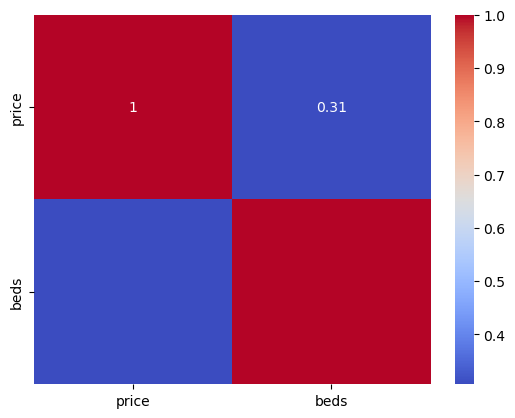

In [137]:
sns.heatmap(
    df_subset1.corr(),
    annot = True,
    cmap = "coolwarm"
)

In [138]:
# Convertir los valores mayores a 20 en NaN
df2.loc[df2['beds'] > 20, 'beds'] = np.nan

In [544]:
# Calcular el promedio de la columna 'beds'
mean_value1 = df2['beds'].mean()

In [546]:
# Sustituir los valores nulos por el promedio
df2['beds'] = df2['beds'].fillna(mean_value1)

In [141]:
# Comprobación valores nulos 
df2['beds'].isnull().sum()

0

### 3.18 minimum_nights

In [143]:
# Comprobación valores nulos 
df2['minimum_nights'].isnull().sum()

0

In [144]:
# Convertir los valores mayores a 400 en NaN
df2.loc[df2['minimum_nights'] > 400, 'minimum_nights'] = np.nan

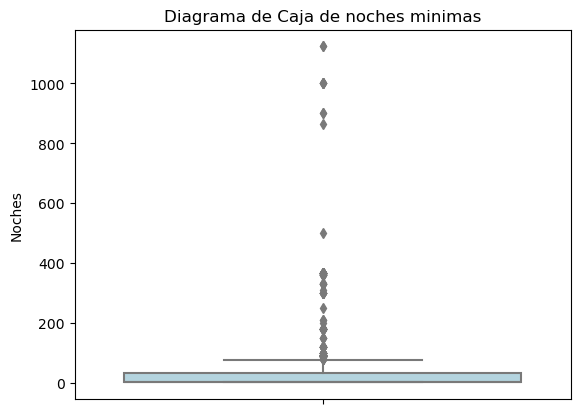

In [145]:
sns.boxplot(y=df['minimum_nights'], color='lightblue')

# Añadir etiquetas y título
plt.ylabel('Noches')
plt.title('Diagrama de Caja de noches minimas')

# Mostrar la gráfica
plt.show()

In [146]:
# Calcular la mediana de la columna 'minimum_nights'
median_value = df2['minimum_nights'].median()

In [147]:
#Sustituir nulos por la mediana
df2['minimum_nights'] = df2['minimum_nights'].fillna(median_value)

### 3.19 maximum_nights

In [149]:
# Comprobación valores nulos 
df2['maximum_nights'].isnull().sum()

0

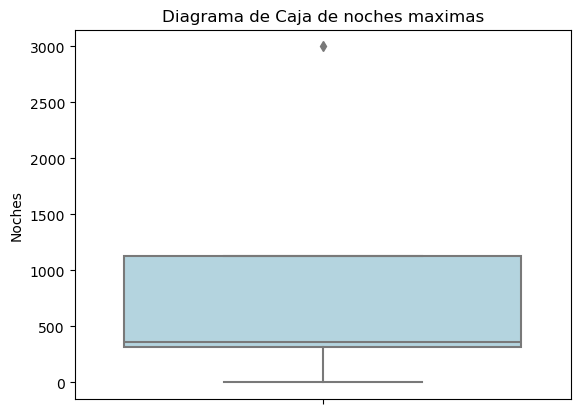

In [150]:
sns.boxplot(y=df['maximum_nights'], color='lightblue')

# Añadir etiquetas y título
plt.ylabel('Noches')
plt.title('Diagrama de Caja de noches maximas')

# Mostrar la gráfica
plt.show()

In [151]:
# Convertir los valores mayores a 400 en NaN
df2.loc[df2['maximum_nights'] > 1500, 'maximum_nights'] = np.nan

In [152]:
# Calcular la mediana de la columna 'maximum_nights'
median_value = df2['maximum_nights'].median()

In [153]:
# Sustituir nulos por la mediana
df2['maximum_nights'] = df2['maximum_nights'].fillna(median_value)

In [154]:
# Comprobación valores únicos
df2['maximum_nights'].unique()

array([7.600e+02, 1.125e+03, 3.200e+01, 3.100e+01, 1.200e+02, 3.650e+02,
       3.640e+02, 9.000e+01, 7.300e+02, 2.800e+01, 1.500e+02, 1.000e+03,
       3.300e+02, 6.000e+00, 6.000e+01, 3.000e+01, 6.600e+01, 3.000e+02,
       2.100e+02, 2.700e+01, 1.800e+02, 1.000e+01, 1.300e+02, 3.200e+02,
       3.500e+02, 1.500e+01, 4.000e+02, 4.500e+01, 4.000e+01, 3.330e+02,
       3.600e+02, 1.800e+01, 1.600e+02, 9.100e+01, 6.000e+02, 1.124e+03,
       6.200e+01, 1.700e+01, 3.000e+00, 1.000e+02, 3.500e+01, 5.000e+01,
       9.300e+01, 4.500e+02, 2.000e+01, 1.240e+02, 5.000e+02, 3.410e+02,
       2.000e+02, 2.100e+01, 3.300e+01, 9.200e+01, 1.121e+03, 1.122e+03,
       3.400e+02, 1.860e+02, 7.000e+01, 6.300e+02, 7.000e+00, 5.000e+00,
       1.250e+02, 2.900e+01, 1.280e+02, 2.500e+02, 9.500e+01, 1.111e+03,
       1.900e+02, 1.990e+02, 2.700e+02, 7.000e+02, 1.400e+01, 1.100e+03,
       2.500e+01, 3.600e+01, 4.000e+00, 6.400e+01, 8.000e+00, 1.123e+03,
       3.550e+02, 3.310e+02, 9.990e+02, 9.000e+00, 

In [155]:
# Convertir los valores de la columna 'maximum_nights' a cadenas con formato decimal
df2['maximum_nights'] = df2['maximum_nights'].apply(lambda x: '{:.2f}'.format(x))

In [156]:
# Comprobación valores únicos
df2['maximum_nights'].unique()

array(['760.00', '1125.00', '32.00', '31.00', '120.00', '365.00',
       '364.00', '90.00', '730.00', '28.00', '150.00', '1000.00',
       '330.00', '6.00', '60.00', '30.00', '66.00', '300.00', '210.00',
       '27.00', '180.00', '10.00', '130.00', '320.00', '350.00', '15.00',
       '400.00', '45.00', '40.00', '333.00', '360.00', '18.00', '160.00',
       '91.00', '600.00', '1124.00', '62.00', '17.00', '3.00', '100.00',
       '35.00', '50.00', '93.00', '450.00', '20.00', '124.00', '500.00',
       '341.00', '200.00', '21.00', '33.00', '92.00', '1121.00',
       '1122.00', '340.00', '186.00', '70.00', '630.00', '7.00', '5.00',
       '125.00', '29.00', '128.00', '250.00', '95.00', '1111.00',
       '190.00', '199.00', '270.00', '700.00', '14.00', '1100.00',
       '25.00', '36.00', '4.00', '64.00', '8.00', '1123.00', '355.00',
       '331.00', '999.00', '9.00', '366.00', '1120.00', '280.00', '13.00',
       '334.00', '11.00', '335.00', '84.00', '80.00', '26.00', '12.00',
       '99.00

In [157]:
df2['maximum_nights'] = df2['maximum_nights'].astype('float64')

### 3.20 review_scores_checkin

In [159]:
# Comprobación valores nulos
df2.review_scores_checkin.isnull().sum()

3335

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


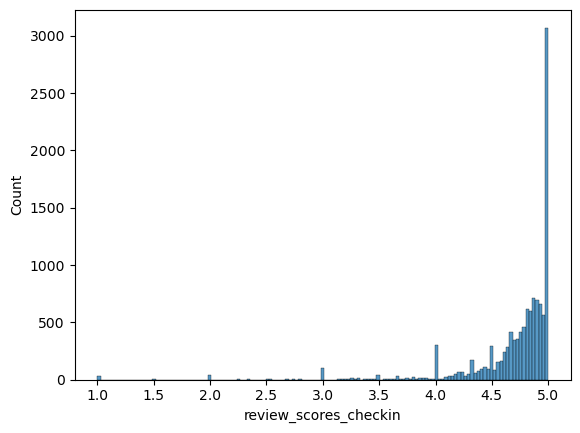

In [160]:
sns.histplot(data = df2, x='review_scores_checkin')
plt.show()

In [161]:
# Completar valor nulos con la media
media_checkin =  round(df2['review_scores_checkin'].mean(), 6)

df2['review_scores_checkin'] = df2['review_scores_checkin'].fillna(media_checkin)

In [162]:
# Comprobación valores nulos
df2.review_scores_checkin.isnull().sum()

0

### 3.21 review_scores_communication

In [164]:
# Comprobación valores nulos
df2.review_scores_communication.isnull().sum()

3334

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


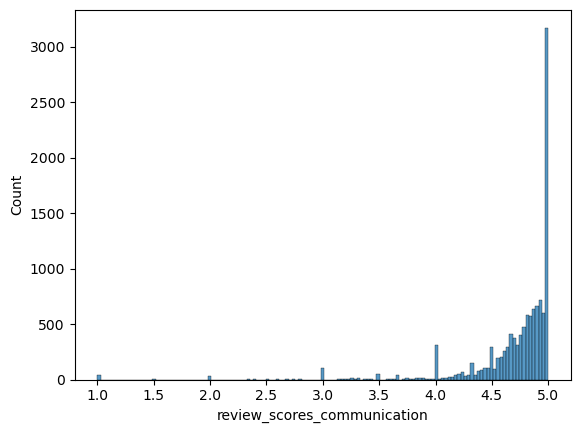

In [165]:
sns.histplot(data = df2, x='review_scores_communication')
plt.show()

In [166]:
# Completar valor nulos con la media
media_communication = df2['review_scores_communication'].mean()

df2['review_scores_communication'] = df2['review_scores_communication'].fillna(media_communication)

In [167]:
# Comprobación valores nulos
df2.review_scores_communication.isnull().sum()

0

### 3.22 review_scores_location

In [169]:
# Comprobación valores nulos
df2.review_scores_location.isnull().sum()

3335

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


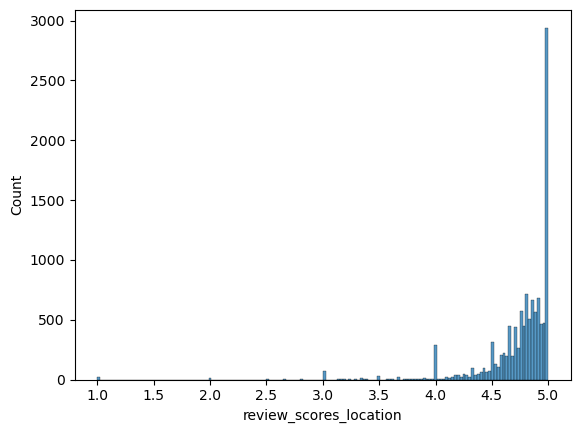

In [170]:
sns.histplot(data = df2, x='review_scores_location')
plt.show()

In [171]:
# Completar valor nulos con la media
media_location = df2['review_scores_location'].mean()

df2['review_scores_location'] = df2['review_scores_location'].fillna(media_location)

In [172]:
# Comprobación valores nulos
df2.review_scores_location.isnull().sum()

0

### 3.23 review_scores_value

In [174]:
# Comprobación valores nulos
df2.review_scores_value.isnull().sum()

3334

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


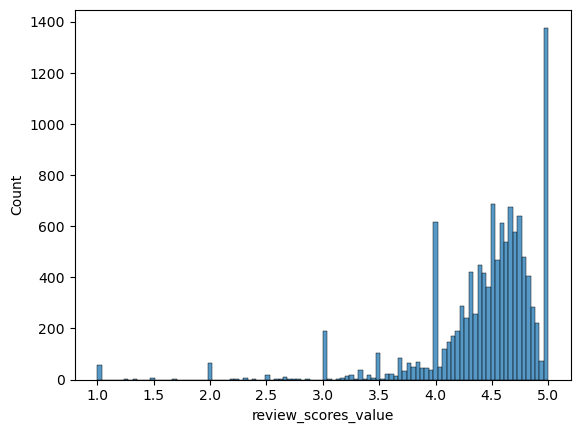

In [175]:
sns.histplot(data = df2, x='review_scores_value')
plt.show()

In [176]:
# Completar valor nulos con la media
media_value = df2['review_scores_value'].mean()

df2['review_scores_value'] = df2['review_scores_value'].fillna(media_value)

In [177]:
# Comprobación valores nulos
df2.review_scores_value.isnull().sum()

0

### 3.24 license

In [179]:
# A partir de esta columna, creamos otra llamada 'has_license' que indique True si la columna tiene info, else false
df2['has_license'] = df2['license'].notna()

In [180]:
# Contamos los TRUE y FALSE
df2.groupby('has_license').count()

,description,name,host_since,host_location,host_is_superhost,host_identity_verified,host_has_profile_pic,neighbourhood,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,license,instant_bookable,listing_url,type_bathroom
has_license,,,,,,,,,,,,,,,,,,,,,
False,3992,4163,4163,4163,4163,4163,4163,4163,4163,4163,...,4163,4163,4163,4163,4163,2232,0,4163,4163,4163
True,10710,11026,11026,11026,11026,11026,11026,11026,11026,11026,...,11026,11026,11026,11026,11026,9640,11026,11026,11026,11026


In [181]:
# Convertir columna a tipo de dato booleano
df2['has_license'] = df2['has_license'].astype(bool)

In [182]:
# Comprobación valores únicos
df2['has_license'].unique()

array([ True, False])

In [183]:
# Comprobación tipo columna
df2['has_license'].dtype

dtype('bool')

In [184]:
# Eliminación columna license
df2.drop('license', axis=1, inplace=True)

### 3.25 reviews_per_month

In [186]:
# Comprobación valores nulos
df2.reviews_per_month.isnull().sum()

3317

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


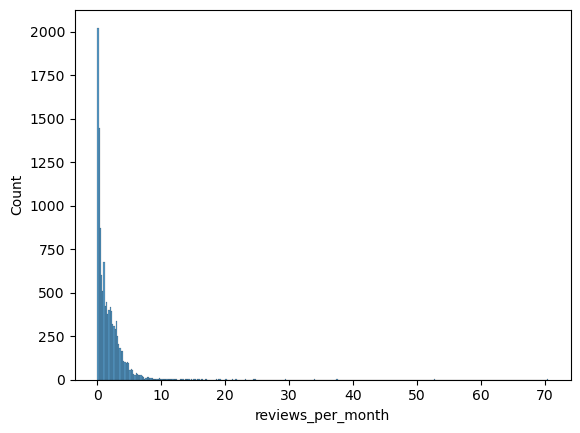

In [187]:
sns.histplot(data = df2, x='reviews_per_month')
plt.show()

In [188]:
# Completar valor nulos con la media
media_reviews_per_month = df2['reviews_per_month'].mean()

df2['reviews_per_month'] = df2['reviews_per_month'].fillna(media_reviews_per_month)

In [189]:
# Comprobación nulos
df2.reviews_per_month.isnull().sum()

0

In [190]:
# Comprobación valores únicos
df2['reviews_per_month'].unique()

array([1.1500000e+00, 2.0000000e-02, 3.0000000e-01, 4.8000000e-01,
       7.7000000e-01, 1.1800000e+00, 8.0000000e-02, 1.9600000e+00,
       9.0000000e-02, 1.4000000e+00, 9.6000000e-01, 2.0200000e+00,
       5.8000000e-01, 5.7000000e-01, 6.9000000e-01, 3.9400000e+00,
       2.1500000e+00, 2.3800000e+00, 1.3000000e-01, 1.7136902e+00,
       5.0000000e-02, 1.0000000e-02, 5.1000000e-01, 1.7200000e+00,
       6.0000000e-02, 4.1000000e-01, 6.8700000e+00, 4.7000000e-01,
       2.9000000e-01, 3.7000000e-01, 6.5000000e-01, 1.1000000e-01,
       7.9000000e-01, 1.8100000e+00, 1.8000000e-01, 2.4400000e+00,
       4.1100000e+00, 1.6000000e+00, 1.9000000e+00, 4.4000000e-01,
       1.9200000e+00, 4.2000000e-01, 7.8000000e-01, 3.3000000e-01,
       3.9000000e-01, 5.3000000e-01, 2.7200000e+00, 8.6000000e-01,
       4.0000000e-02, 8.7000000e-01, 8.0000000e-01, 3.4000000e-01,
       3.6000000e-01, 3.1000000e-01, 4.6000000e-01, 8.1000000e-01,
       1.9000000e-01, 2.2000000e-01, 8.2000000e-01, 2.7000000e

In [191]:
# Convertir los valores de la columna 'reviews_per_month' a cadenas con formato decimal
df2['reviews_per_month'] = df2['reviews_per_month'].apply(lambda x: '{:.2f}'.format(x))

In [192]:
# Comprobación valores únicos
df2['reviews_per_month'].unique()

array(['1.15', '0.02', '0.30', '0.48', '0.77', '1.18', '0.08', '1.96',
       '0.09', '1.40', '0.96', '2.02', '0.58', '0.57', '0.69', '3.94',
       '2.15', '2.38', '0.13', '1.71', '0.05', '0.01', '0.51', '1.72',
       '0.06', '0.41', '6.87', '0.47', '0.29', '0.37', '0.65', '0.11',
       '0.79', '1.81', '0.18', '2.44', '4.11', '1.60', '1.90', '0.44',
       '1.92', '0.42', '0.78', '0.33', '0.39', '0.53', '2.72', '0.86',
       '0.04', '0.87', '0.80', '0.34', '0.36', '0.31', '0.46', '0.81',
       '0.19', '0.22', '0.82', '0.27', '0.12', '2.69', '0.95', '0.67',
       '1.86', '1.73', '0.98', '2.55', '1.55', '2.98', '1.17', '3.36',
       '2.77', '0.91', '0.17', '1.67', '0.03', '4.10', '0.93', '1.12',
       '0.50', '1.83', '1.33', '3.02', '1.02', '1.06', '0.21', '0.07',
       '0.20', '2.01', '3.82', '0.90', '1.53', '1.75', '2.88', '1.93',
       '1.07', '2.60', '0.24', '0.25', '1.31', '2.52', '1.57', '0.62',
       '1.45', '1.05', '4.52', '2.36', '1.36', '2.32', '2.14', '0.94',
      

In [193]:
df2['reviews_per_month'] = df2['reviews_per_month'].astype('float64')

### 3.26 listing_url

In [195]:
# Eliminación columna porque ya no es necesaria 
df2 = df2.drop(columns=['listing_url'])

### 3.27 instant_bookable

In [197]:
# Comprobación valores únicos
df2['instant_bookable'].unique()

array(['t', 'f'], dtype=object)

In [198]:
# Convertir columna a tipo de dato booleano
df2['instant_bookable'] = df2['instant_bookable'].replace({'t': True, 'f': False})

In [199]:
# Comprobación tipo de dato
df2['instant_bookable'].dtype

dtype('bool')

# 4. TRATAMIENTO COLUMNAS DE TEXTO: 'name', 'description' y 'amenities'

In [201]:
# Crear una función para limpiar texto, eliminando caracteres no alfabéticos y convirtiendo todo a minúsculas.
def limpiar_texto(texto):
    if pd.isna(texto):
        return ''
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)
    return texto 

In [202]:
df2['name'] = df2['name'].apply(limpiar_texto)
df2['description'] = df2['description'].apply(limpiar_texto)
df2['amenities'] = df2['amenities'].apply(limpiar_texto)

In [203]:
# Crear función para verificar la presencia de palabras clave 
def verificar_palabras_filas(row, palabras):
    for columna in ['amenities', 'name', 'description']:
        if any(palabra in row[columna] for palabra in palabras):
            return 1  # TRUE
    return 0          # FALSE

In [204]:
# Definir palabras clave
palabras_a_buscar = ['terrace', 'veranda']
palabras_a_buscar2 = ['wifi', 'wireless internet', 'wireless connection']
palabras_a_buscar3 = ['pet', 'pet-friendly', 'pets allowed', 'pet accommodation']
palabras_a_buscar4 = ['air', 'air conditioning', 'ac (air conditioning)', 'climate control']
palabras_a_buscar5 = ['kitchen', 'cooking area', 'culinary space']

In [205]:
# Crear nuevas columnas referentes a las amenities
df2['Tiene_terraza'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar)
df2['Tiene_wifi'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar2)
df2['Permite_Mascotas'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar3)
df2['Tiene_aire'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar4)
df2['Tiene_cocina'] = df2.apply(verificar_palabras_filas, axis=1, palabras=palabras_a_buscar5)

In [206]:
# Conteos
conteo1 = df2['Tiene_terraza'].value_counts()
print(conteo1)

conteo2 = df2['Tiene_wifi'].value_counts()
print(conteo2)

conteo3 = df2['Permite_Mascotas'].value_counts()
print(conteo3)

conteo4 = df2['Tiene_aire'].value_counts()
print(conteo4)

conteo5 = df2['Tiene_cocina'].value_counts()
print(conteo5)

Tiene_terraza
0    12667
1     2522
Name: count, dtype: int64
Tiene_wifi
1    14947
0      242
Name: count, dtype: int64
Permite_Mascotas
0    12597
1     2592
Name: count, dtype: int64
Tiene_aire
1    13745
0     1444
Name: count, dtype: int64
Tiene_cocina
1    14046
0     1143
Name: count, dtype: int64


In [207]:
print(df2[['Tiene_terraza', 'Tiene_wifi', 'Permite_Mascotas', 'Tiene_aire', 'Tiene_cocina']].head(10))

    Tiene_terraza  Tiene_wifi  Permite_Mascotas  Tiene_aire  Tiene_cocina
0               0           1                 0           1             1
1               0           1                 0           0             1
2               0           1                 0           1             1
4               1           1                 0           1             1
5               0           1                 0           1             1
6               0           1                 0           1             1
7               0           1                 0           1             1
8               0           1                 1           1             1
9               0           1                 0           1             1
10              0           1                 0           1             1


In [208]:
# Eliminación columnas 'name', 'description' y 'amenities'
df2 = df2.drop(columns=['name', 'description', 'amenities'])

# 5. REVISIÓN DF2 DESPUÉS DE LIMPIEZA

### 4.1 Shape

In [211]:
df2.shape

(15189, 37)

### 4.2 Columnas

In [213]:
list(enumerate(df2.columns))

[(0, 'host_since'),
 (1, 'host_location'),
 (2, 'host_is_superhost'),
 (3, 'host_identity_verified'),
 (4, 'host_has_profile_pic'),
 (5, 'neighbourhood'),
 (6, 'latitude'),
 (7, 'longitude'),
 (8, 'property_type'),
 (9, 'room_type'),
 (10, 'accommodates'),
 (11, 'bathrooms'),
 (12, 'bedrooms'),
 (13, 'beds'),
 (14, 'price'),
 (15, 'minimum_nights'),
 (16, 'maximum_nights'),
 (17, 'has_availability'),
 (18, 'availability_30'),
 (19, 'availability_60'),
 (20, 'number_of_reviews'),
 (21, 'last_review'),
 (22, 'review_scores_rating'),
 (23, 'review_scores_cleanliness'),
 (24, 'review_scores_checkin'),
 (25, 'review_scores_communication'),
 (26, 'review_scores_location'),
 (27, 'review_scores_value'),
 (28, 'reviews_per_month'),
 (29, 'instant_bookable'),
 (30, 'type_bathroom'),
 (31, 'has_license'),
 (32, 'Tiene_terraza'),
 (33, 'Tiene_wifi'),
 (34, 'Permite_Mascotas'),
 (35, 'Tiene_aire'),
 (36, 'Tiene_cocina')]

### 4.3 Información

In [215]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15189 entries, 0 to 18924
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   15189 non-null  int64  
 1   host_location                15189 non-null  object 
 2   host_is_superhost            15189 non-null  bool   
 3   host_identity_verified       15189 non-null  bool   
 4   host_has_profile_pic         15189 non-null  bool   
 5   neighbourhood                15189 non-null  object 
 6   latitude                     15189 non-null  float64
 7   longitude                    15189 non-null  float64
 8   property_type                15189 non-null  object 
 9   room_type                    15189 non-null  object 
 10  accommodates                 15189 non-null  int64  
 11  bathrooms                    15189 non-null  float64
 12  bedrooms                     15189 non-null  float64
 13  beds                 

### 4.4 Valores nulos

In [217]:
df2.isnull().sum()

host_since                     0
host_location                  0
host_is_superhost              0
host_identity_verified         0
host_has_profile_pic           0
neighbourhood                  0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_60                0
number_of_reviews              0
last_review                    0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
instant_bookable               0
type_bathr

# 6. ANÁLISIS EXPLORATORIO (EDA)

### has_availability

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


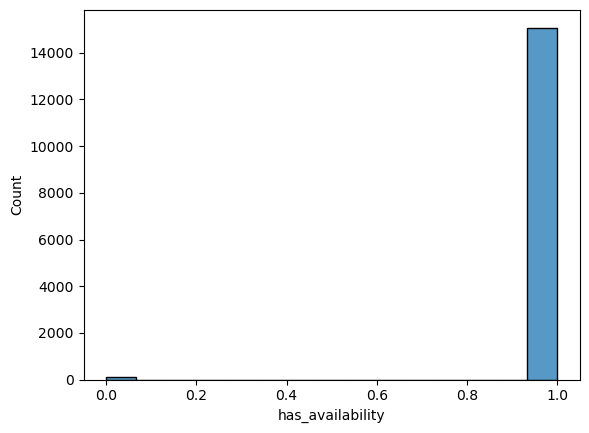

In [220]:
sns.histplot(data = df2, x='has_availability')
plt.show()

### availability_30

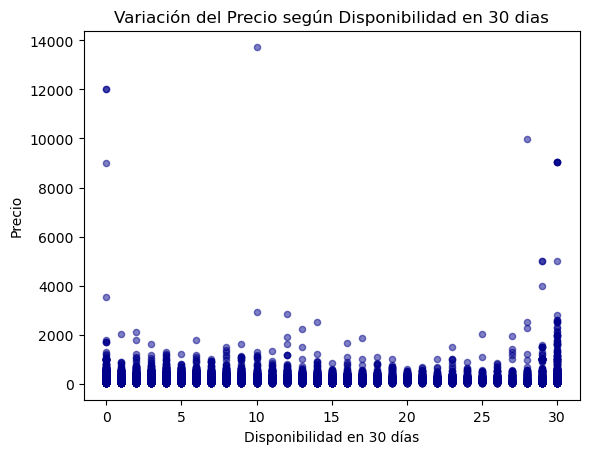

In [222]:
df2.plot(kind='scatter', x='availability_30', y='price', color='darkblue', alpha=0.5)

plt.xlabel('Disponibilidad en 30 días')
plt.ylabel('Precio')
plt.title('Variación del Precio según Disponibilidad en 30 dias')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


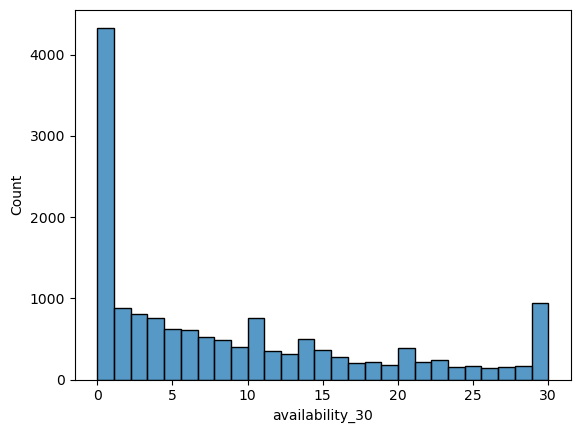

In [223]:
sns.histplot(data = df2, x='availability_30')
plt.show()

### availability_60

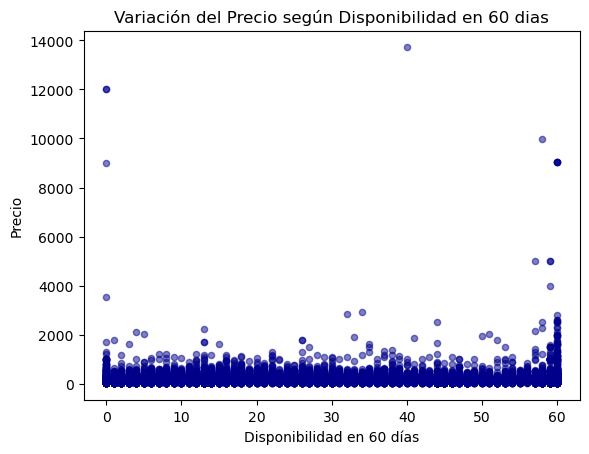

In [225]:
df2.plot(kind='scatter', x='availability_60', y='price', color='darkblue', alpha=0.5)

plt.xlabel('Disponibilidad en 60 días')
plt.ylabel('Precio')
plt.title('Variación del Precio según Disponibilidad en 60 dias')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


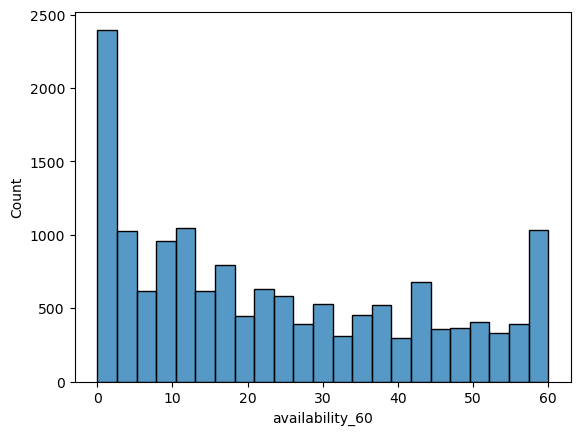

In [226]:
sns.histplot(data = df2, x='availability_60')
plt.show()

### number_of_reviews

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


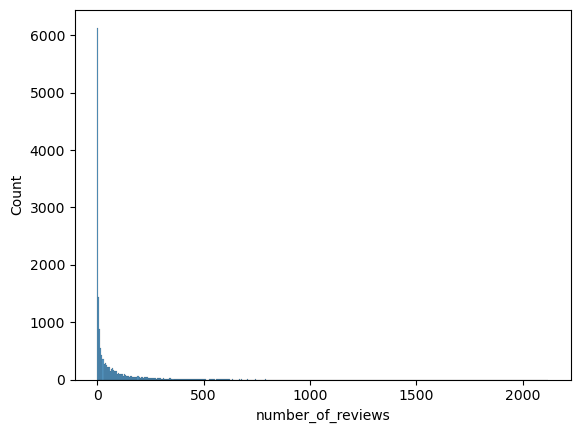

In [228]:
sns.histplot(data = df2, x='number_of_reviews')
plt.show()

### reviews_score_rating

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


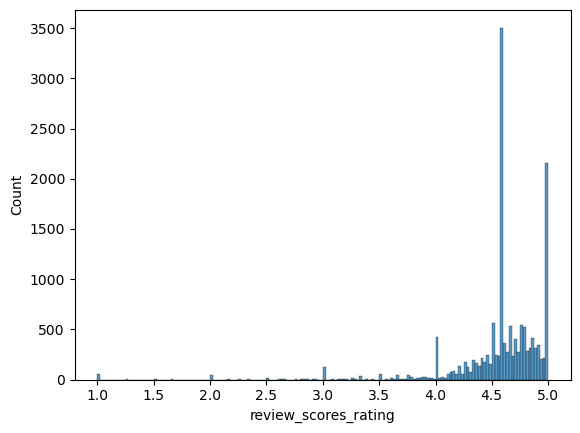

In [230]:
sns.histplot(data = df2, x='review_scores_rating')
plt.show()

### review_scores_cleanliness

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


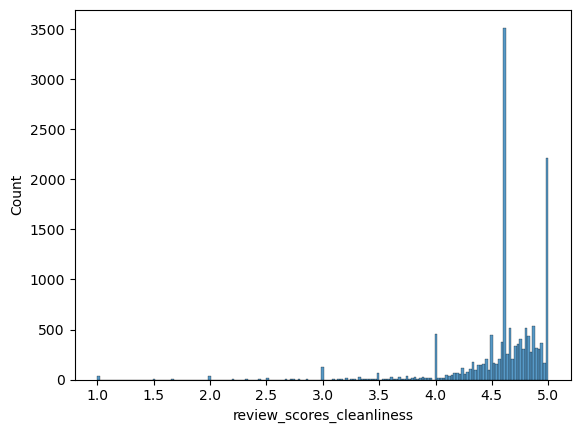

In [232]:
sns.histplot(data = df2, x='review_scores_cleanliness')
plt.show()

### review_scores_checkin

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


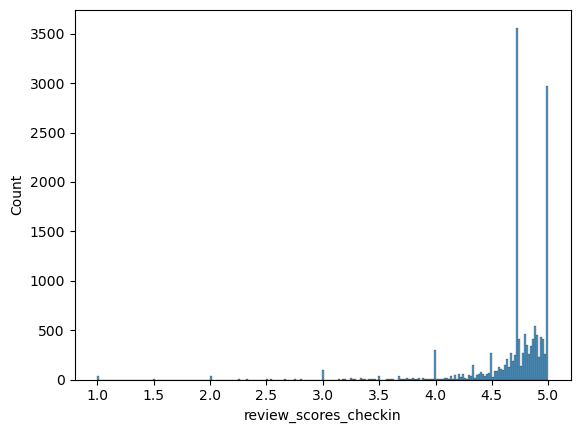

In [234]:
sns.histplot(data = df2, x='review_scores_checkin')
plt.show()

### review_scores_communication

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


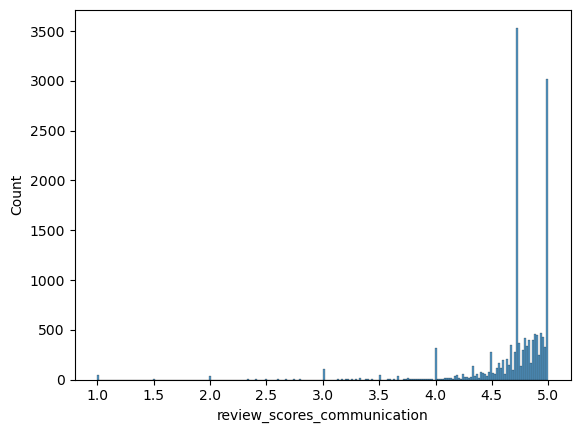

In [236]:
sns.histplot(data = df2, x='review_scores_communication')
plt.show()

### review_scores_location

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


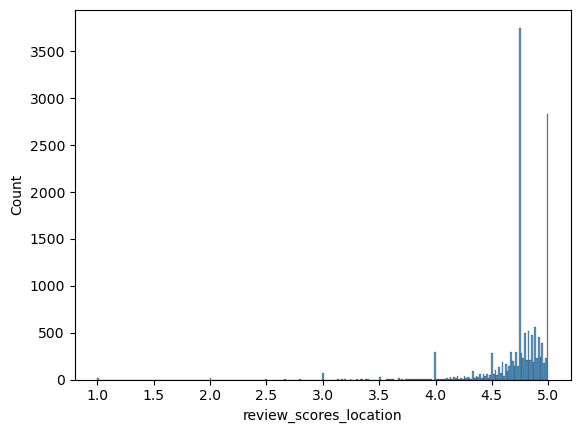

In [238]:
sns.histplot(data = df2, x='review_scores_location')
plt.show()

### review_scores_value

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


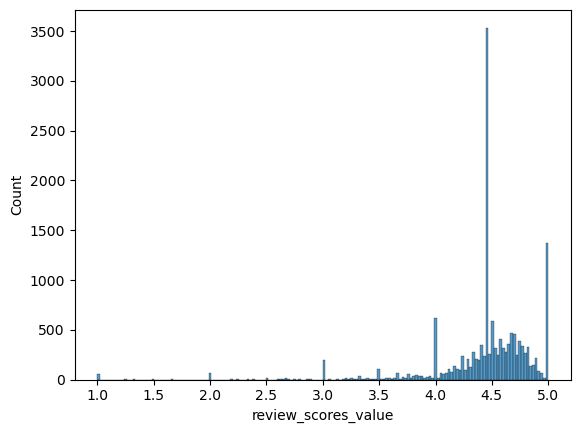

In [240]:
sns.histplot(data = df2, x='review_scores_value')
plt.show()

### reviews_per_month

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


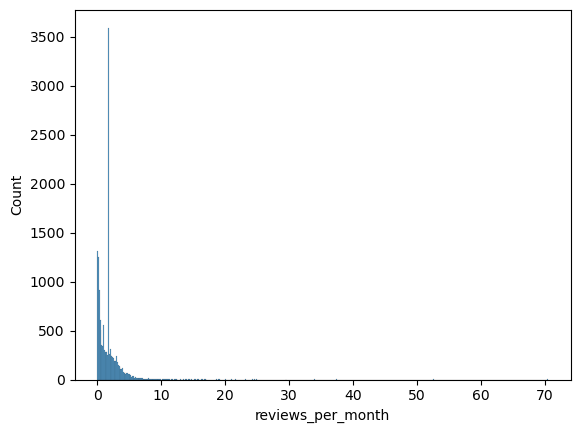

In [242]:
sns.histplot(data = df2, x='reviews_per_month')
plt.show()

In [243]:
for columna in df2.columns:
    # Obtener los valores únicos de la columna
    valores_unicos = df2[columna].unique()
    
    # Imprimir el nombre de la columna y sus valores únicos
    print(f"Valores únicos en la columna '{columna}':")
    print(valores_unicos)
    print("\n")

Valores únicos en la columna 'host_since':
[4646 5312 5263 ... 2760 1203   59]


Valores únicos en la columna 'host_location':
['spain' 'no_info' 'no_spain']


Valores únicos en la columna 'host_is_superhost':
[False  True]


Valores únicos en la columna 'host_identity_verified':
[ True False]


Valores únicos en la columna 'host_has_profile_pic':
[ True False]


Valores únicos en la columna 'neighbourhood':
['eixample' 'ciutat_vella' 'sant_marti' 'gracia' 'sarria_sant_gervasi'
 'sants_montjuic' 'les_corts' 'horta_guinardo' 'sant_andreu' 'nou_barris']


Valores únicos en la columna 'latitude':
[41.40181    41.37936    41.40556    ... 41.37759841 41.38947967
 41.37972424]


Valores únicos en la columna 'longitude':
[2.1761     2.17376    2.17262    ... 2.17700595 2.17862121 2.12564   ]


Valores únicos en la columna 'property_type':
['entire_loft' 'entire_rental_unit' 'entire_condo' 'entire_vacation_home'
 'entire_home' 'entire_serviced_apartment' 'private_room_in_rental_unit'
 'entire_

In [244]:
df2.head()

,host_since,host_location,host_is_superhost,host_identity_verified,host_has_profile_pic,neighbourhood,latitude,longitude,property_type,room_type,...,review_scores_value,reviews_per_month,instant_bookable,type_bathroom,has_license,Tiene_terraza,Tiene_wifi,Permite_Mascotas,Tiene_aire,Tiene_cocina
0,4646,spain,False,True,True,eixample,41.401810,2.17610,entire_loft,entire_home_apt,...,4.67,1.15,True,private,True,0,1,0,1,1
1,4646,spain,False,True,True,ciutat_vella,41.379360,2.17376,entire_rental_unit,entire_home_apt,...,4.50,0.02,False,private,True,0,1,0,0,1
2,5312,spain,False,True,True,eixample,41.405560,2.17262,entire_rental_unit,entire_home_apt,...,4.30,0.30,True,private,True,0,1,0,1,1
4,5263,spain,False,True,True,sant_marti,41.412432,2.21975,entire_rental_unit,entire_home_apt,...,4.64,0.48,False,private,True,1,1,0,1,1
5,5180,spain,False,True,True,gracia,41.405660,2.17015,entire_rental_unit,entire_home_apt,...,4.50,0.77,False,private,True,0,1,0,1,1


In [245]:
df2['Tiene_terraza'] = df2['Tiene_terraza'].astype('bool')

In [246]:
df2['Tiene_wifi'] = df2['Tiene_wifi'].astype('bool')

In [247]:
df2['Permite_Mascotas'] = df2['Permite_Mascotas'].astype('bool')

In [248]:
df2['Tiene_aire'] = df2['Tiene_aire'].astype('bool')

In [249]:
df2['Tiene_cocina'] = df2['Tiene_cocina'].astype('bool')

In [250]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15189 entries, 0 to 18924
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   15189 non-null  int64  
 1   host_location                15189 non-null  object 
 2   host_is_superhost            15189 non-null  bool   
 3   host_identity_verified       15189 non-null  bool   
 4   host_has_profile_pic         15189 non-null  bool   
 5   neighbourhood                15189 non-null  object 
 6   latitude                     15189 non-null  float64
 7   longitude                    15189 non-null  float64
 8   property_type                15189 non-null  object 
 9   room_type                    15189 non-null  object 
 10  accommodates                 15189 non-null  int64  
 11  bathrooms                    15189 non-null  float64
 12  bedrooms                     15189 non-null  float64
 13  beds                 

# EDA PRUEBA

# Distribución de la variable objetivo ("price")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

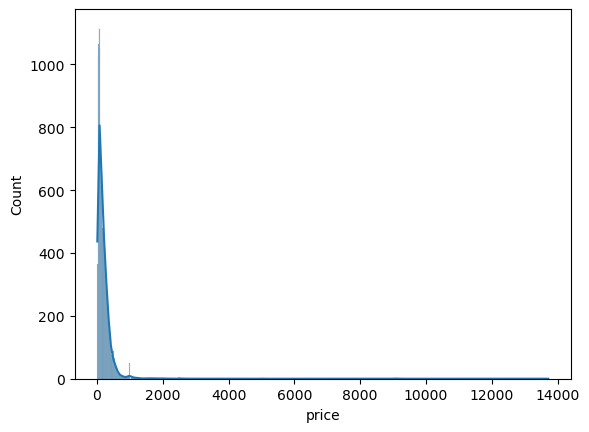

In [253]:
import seaborn as sns
sns.histplot(df2['price'], kde=True)

Este gráfico muestra una distribución de precios sesgada hacia la izquierda, donde la mayoría de los precios se concentran en valores bajos, probablemente por debajo de los 1000. Esto sugiere que la mayoría de las propiedades analizadas tienen precios accesibles, lo que podría apuntar a una oferta abundante de opciones económicas. Sin embargo, también se observa una larga cola que se extiende hacia valores altos, indicando la existencia de algunos precios significativamente más elevados que el promedio, posiblemente representando propiedades de lujo. La distribución asimétrica refleja que los precios altos son raros, mientras que los bajos son mucho más comunes, lo que podría indicar un mercado dominado por la accesibilidad con algunas excepciones de mayor costo.

# Relación de las variables categóricas

## 'neighbourhood'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'eixample'),
  Text(1, 0, 'ciutat_vella'),
  Text(2, 0, 'sant_marti'),
  Text(3, 0, 'gracia'),
  Text(4, 0, 'sarria_sant_gervasi'),
  Text(5, 0, 'sants_montjuic'),
  Text(6, 0, 'les_corts'),
  Text(7, 0, 'horta_guinardo'),
  Text(8, 0, 'sant_andreu'),
  Text(9, 0, 'nou_barris')])

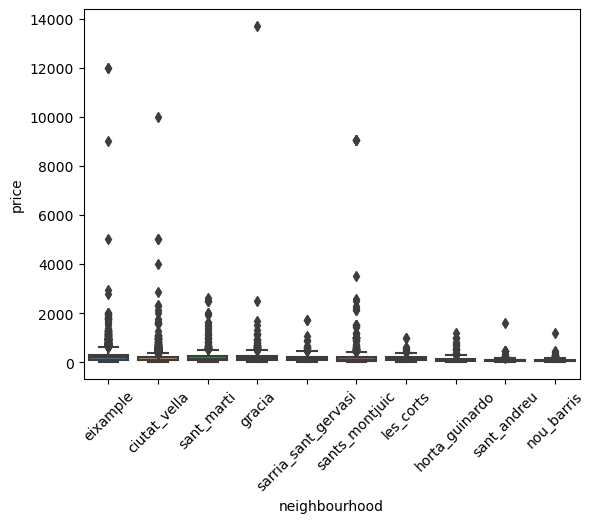

In [258]:
sns.boxplot(x='neighbourhood', y='price', data=df2)
plt.xticks(rotation=45)

Este gráfico muestra la distribución de precios por diferentes barrios, con una gran concentración de precios bajos en la mayoría de los vecindarios. Sin embargo, hay algunos valores atípicos que destacan con precios significativamente más altos, especialmente en los barrios como Eixample y Ciutat Vella, donde se observan los precios más extremos, llegando hasta los 14,000. Estos barrios parecen tener una mayor variabilidad de precios en comparación con otros como Nou Barris o Sant Andreu, que tienen precios más consistentes y menos dispersos. Esto podría indicar que áreas como Eixample y Ciutat Vella tienen una mayor oferta de propiedades de lujo, mientras que en barrios más periféricos, los precios tienden a ser más estables y accesibles.

## 'host_location'

(array([0, 1, 2]),
 [Text(0, 0, 'spain'), Text(1, 0, 'no_info'), Text(2, 0, 'no_spain')])

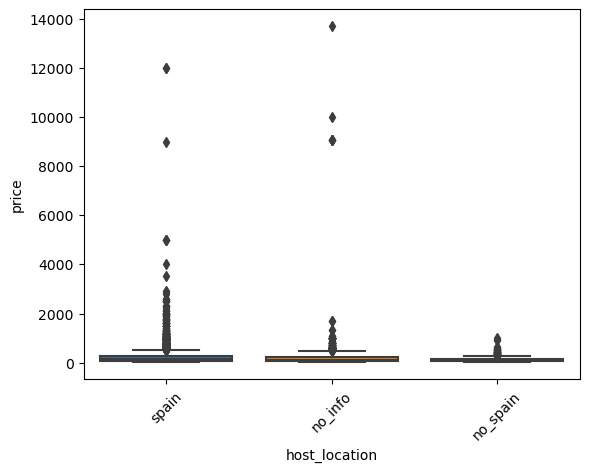

In [261]:
sns.boxplot(x='host_location', y='price', data=df2)
plt.xticks(rotation=45)

Este gráfico muestra la relación entre la ubicación del anfitrión y los precios de las propiedades. Algunos patrones observados:

España (Spain): Los anfitriones ubicados en España presentan una mayor dispersión de precios, con varios valores atípicos que alcanzan hasta los 14,000. Esto sugiere que los anfitriones locales pueden tener una mayor oferta de propiedades de lujo o con precios más altos.

Sin información (no_info): Los precios de los anfitriones sin ubicación clara tienen menos variabilidad en comparación con los anfitriones en España, aunque todavía hay algunos precios altos que superan los 4,000.

Fuera de España (no_spain): Los anfitriones ubicados fuera de España parecen tener los precios más bajos y más consistentes, con menos valores extremos, lo que sugiere una oferta de propiedades más accesibles.

En general, los anfitriones en España tienden a ofrecer una mayor variedad de precios, incluyendo opciones más caras, en comparación con los de fuera del país o sin información.

## 'room_type'

(array([0, 1, 2, 3]),
 [Text(0, 0, 'entire_home_apt'),
  Text(1, 0, 'private_room'),
  Text(2, 0, 'hotel_room'),
  Text(3, 0, 'shared_room')])

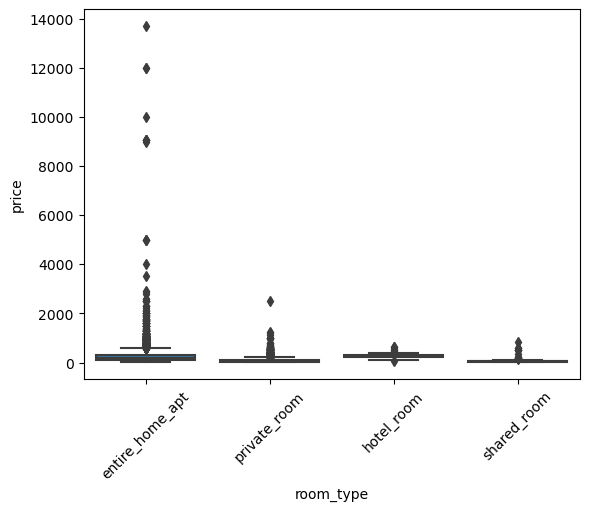

In [269]:
sns.boxplot(x='room_type', y='price', data=df2)
plt.xticks(rotation=45)

## 'type_bathroom'

(array([0, 1]), [Text(0, 0, 'private'), Text(1, 0, 'shared')])

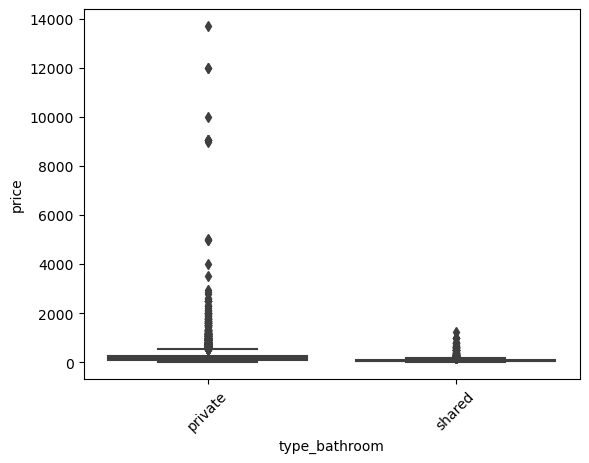

In [271]:
sns.boxplot(x='type_bathroom', y='price', data=df2)
plt.xticks(rotation=45)

In [272]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15189 entries, 0 to 18924
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   15189 non-null  int64  
 1   host_location                15189 non-null  object 
 2   host_is_superhost            15189 non-null  bool   
 3   host_identity_verified       15189 non-null  bool   
 4   host_has_profile_pic         15189 non-null  bool   
 5   neighbourhood                15189 non-null  object 
 6   latitude                     15189 non-null  float64
 7   longitude                    15189 non-null  float64
 8   room_type                    15189 non-null  object 
 9   accommodates                 15189 non-null  int64  
 10  bathrooms                    15189 non-null  float64
 11  bedrooms                     15189 non-null  float64
 12  beds                         15189 non-null  float64
 13  price                

In [273]:
df2 = pd.get_dummies(df2, columns=['type_bathroom', 'room_type', 'neighbourhood', 'host_location'], drop_first=True)

In [274]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15189 entries, 0 to 18924
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   host_since                         15189 non-null  int64  
 1   host_is_superhost                  15189 non-null  bool   
 2   host_identity_verified             15189 non-null  bool   
 3   host_has_profile_pic               15189 non-null  bool   
 4   latitude                           15189 non-null  float64
 5   longitude                          15189 non-null  float64
 6   accommodates                       15189 non-null  int64  
 7   bathrooms                          15189 non-null  float64
 8   bedrooms                           15189 non-null  float64
 9   beds                               15189 non-null  float64
 10  price                              15189 non-null  float64
 11  minimum_nights                     15189 non-null  float64


# Generar Modelo

In [276]:
X = df2.drop(columns='price')
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size = 0.75,
    test_size=0.25
)

In [277]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11391, 46) (3798, 46) (11391,) (3798,)


In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [279]:
# Crear el modelo de random forest
rf_clf = RandomForestClassifier()

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_clf.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy del Random Forest: {accuracy_rf:.2f}')

Accuracy del Random Forest: 0.10
